### 복습 퀴즈

In [1]:
import pingouin as pg

In [2]:
pg.mwu([1,1,1,1,1,30], [2,2,2,2,2,2]) # u검정은 3이든 30이든 p-val이 바뀌지 않음

,U-val,alternative,p-val,RBC,CLES
MWU,6.0,two-sided,0.040462,0.666667,0.166667


In [3]:
pg.ttest([1,1,1,1,1,30], [2,2,2,2,2,2])

C:\Users\mook\anaconda3\lib\site-packages\pingouin\parametric.py:266: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tval, pval = ttest_ind(x, y, equal_var=True, alternative=alternative)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.793103,10,two-sided,0.446127,"[-6.94, 14.6]",0.457898,0.57,0.111069


In [4]:
import pandas as pd
df = pd.read_excel('data/car.xlsx')
df.head()

,mileage,model,price,year,my_car_damage,other_car_damage
0,63608,K3,970,2017,0,564596
1,69336,K3,1130,2015,1839700,1140150
2,36000,K3,1380,2016,446520,2244910
3,19029,K3,1390,2017,889000,4196110
4,97090,K3,760,2015,2339137,2029570


### 상관 계수

<AxesSubplot:xlabel='mileage', ylabel='price'>

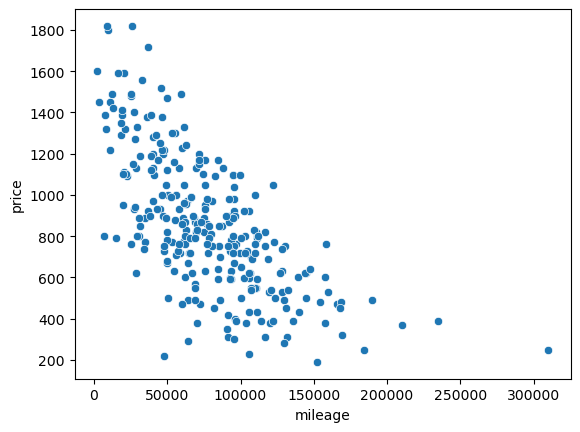

In [5]:
import seaborn as sns
sns.scatterplot(data=df, x='mileage', y='price')

In [6]:
pg.corr(df['mileage'], df['price'])
# p-val < 0.05 => 상관이 있다.
# 피어슨 상관계수 => -0.67616

,n,r,CI95%,p-val,BF10,power
pearson,274,-0.67616,"[-0.74, -0.61]",5.809388e-38,5.069e+34,1.0


<AxesSubplot:xlabel='year', ylabel='price'>

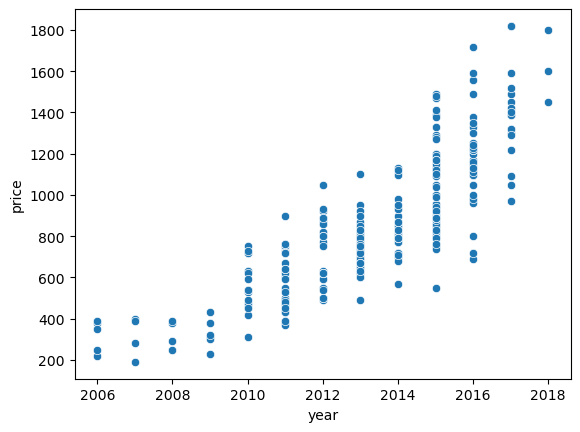

In [7]:
# 실습
# 연식(year)과 가격(price)의 상관 관계
sns.scatterplot(data=df, x='year', y='price')

In [8]:
pg.corr(df['year'], df['price']) # 양희권님 질문: 연도는 이산형인데 피어슨상관계수로 하는게 상관없나요? => 
# p-val < 0.05 => 상관이 있다.
# 피어슨 상관계수 => +0.828908

,n,r,CI95%,p-val,BF10,power
pearson,274,0.828908,"[0.79, 0.86]",1.388002e-70,1.004e+67,1.0


In [9]:
# => 연식의 상관 관계가 주행거리보다 강하다
# => 차를 싸게 사고 싶으면, 연식은 오래 됐지만 주행거리가 짧은 차를 사라!

In [10]:
pg.corr(df.mileage, df.other_car_damage) # pg.corr()에서의 신뢰구간은 상관계수의 신뢰구간
# 귀무가설: 상관 없다 -> 기각 못함 -> 결론 유보
# 신뢰구간 -0.1  0  +0.1

,n,r,CI95%,p-val,BF10,power
pearson,274,0.00795,"[-0.11, 0.13]",0.895775,0.076,0.051912


In [11]:
df.corr(numeric_only=True) # 상관 행렬을 볼 때 조심할 것: 상관 행렬은 사실상 상관 분석을 아주 많이 한 것 == 다중비교 문제 조심! ex) 바이블 코드를 기억하라!

,mileage,price,year,my_car_damage,other_car_damage
mileage,1.000000,-0.676160,-0.569850,0.192549,0.007950
price,-0.676160,1.000000,0.828908,-0.418789,-0.245997
year,-0.569850,0.828908,1.000000,-0.318469,-0.204411
my_car_damage,0.192549,-0.418789,-0.318469,1.000000,0.243626
other_car_damage,0.007950,-0.245997,-0.204411,0.243626,1.000000


In [12]:
# 실습
asset = pd.read_excel('data/asset.xlsx')
asset

,Date,GLD,SPX,KOSPI200
0,44958,1850.6,4147.60,323.75
1,44927,1929.5,4076.60,317.26
2,44896,1826.2,3839.50,291.10
3,44866,1759.9,4080.11,321.00
4,44835,1640.7,3871.98,299.58
...,...,...,...,...
235,37803,355.0,993.32,91.52
236,37773,346.7,974.50,85.47
237,37742,365.6,963.59,80.53
238,37712,339.8,916.92,76.45


<AxesSubplot:xlabel='GLD', ylabel='SPX'>

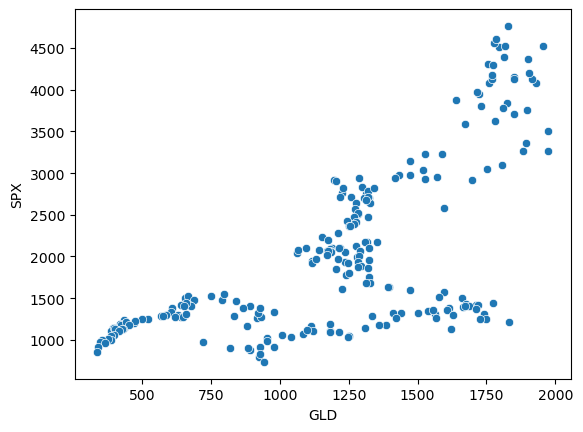

In [13]:
sns.scatterplot(data=asset, x='GLD', y='SPX')

In [14]:
pg.corr(asset['GLD'], asset['SPX'])
# 귀무가설: 상관 없다.
# p-val < 0.05 => 귀무가설 기각 == 상관 있다.
# 피어슨 상관 계수: 0.686535

,n,r,CI95%,p-val,BF10,power
pearson,240,0.686535,"[0.61, 0.75]",8.580001e-35,3.763e+31,1.0


<AxesSubplot:xlabel='Date', ylabel='GLD'>

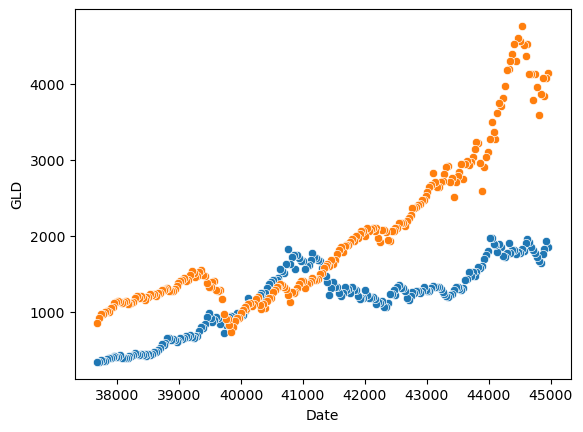

In [15]:
# 현대 포트폴리오 이론에 의하면 금과 주식을 같이 사면 안 된다지만 조금 잘못된 분석임
sns.scatterplot(data=asset, x='Date', y='GLD')
sns.scatterplot(data=asset, x='Date', y='SPX')
# 둘 다 시간에 따라 꾸준히 증가 => 차분을 하고 corr을 다시 구해야 함

In [16]:
asset['GLD'].diff() # 차분(이후기간 - 이전기간)

0        NaN
1       78.9
2     -103.3
3      -66.3
4     -119.2
       ...  
235    -21.3
236     -8.3
237     18.9
238    -25.8
239     -2.9
Name: GLD, Length: 240, dtype: float64

In [17]:
asset['GLD'].diff() # 차분(이후기간 - 이전기간)

0        NaN
1       78.9
2     -103.3
3      -66.3
4     -119.2
       ...  
235    -21.3
236     -8.3
237     18.9
238    -25.8
239     -2.9
Name: GLD, Length: 240, dtype: float64

In [18]:
asset['GLD'].pct_change() # 차분/이전기간 퍼센트

0           NaN
1      0.042635
2     -0.053537
3     -0.036305
4     -0.067731
         ...   
235   -0.056604
236   -0.023380
237    0.054514
238   -0.070569
239   -0.008534
Name: GLD, Length: 240, dtype: float64

In [19]:
asset['SPX'].pct_change() 

0           NaN
1     -0.017118
2     -0.058161
3      0.062667
4     -0.051011
         ...   
235   -0.014573
236   -0.018947
237   -0.011195
238   -0.048433
239   -0.074968
Name: SPX, Length: 240, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='GLD'>

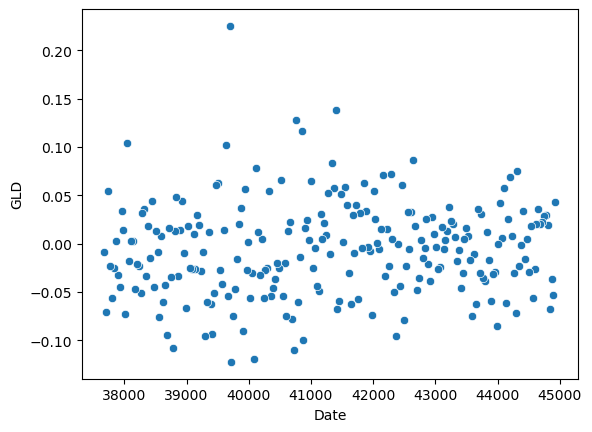

In [20]:
# 시간에 따른 금 수익률
sns.scatterplot(x=asset['Date'], y=asset['GLD'].pct_change())

<AxesSubplot:xlabel='Date', ylabel='SPX'>

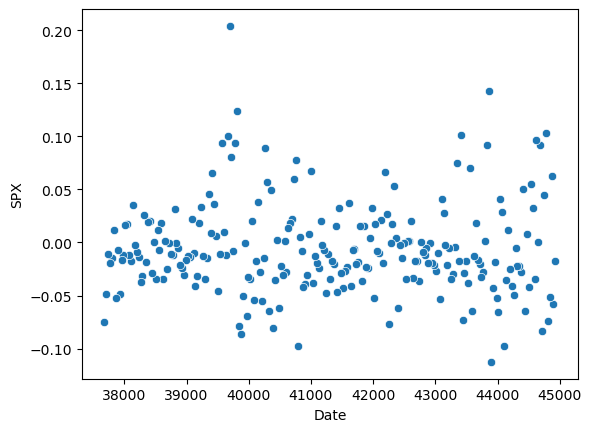

In [21]:
# 시간에 따른 주식 수익률
sns.scatterplot(x=asset['Date'], y=asset['SPX'].pct_change())

<AxesSubplot:xlabel='GLD', ylabel='SPX'>

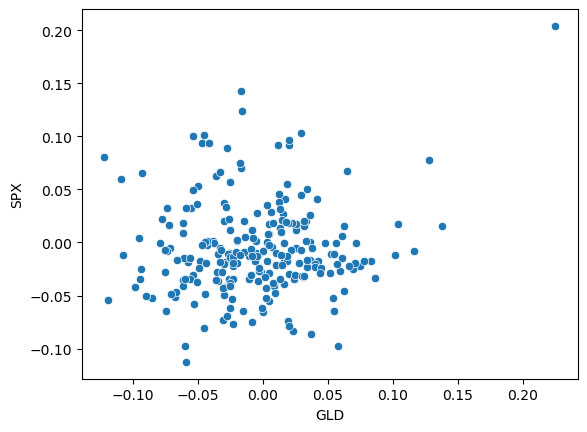

In [22]:
# 금과 주식의 수익률 산점도
sns.scatterplot(x=asset['GLD'].pct_change() , y=asset['SPX'].pct_change())

In [23]:
# 금 수익률과 주식 수익률의 상관 관계
pg.corr(asset['GLD'].pct_change(), asset['SPX'].pct_change())
# 귀무가설: 주가와 금의 수익률은 상관이 없다
# p-val > 0.05 => 기각 X
# 결론을 유보
# 투자 관점: 주식과 금은 같은 포트폴리오에 넣을만하다(실제로 넣으라는 것은 아님)

,n,r,CI95%,p-val,BF10,power
pearson,239,0.10955,"[-0.02, 0.23]",0.091065,0.335,0.394753


<AxesSubplot:xlabel='KOSPI200', ylabel='SPX'>

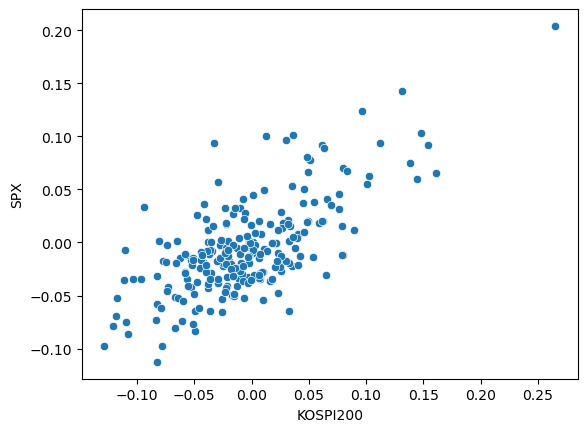

In [24]:
# 한국 주식과 미국 주식 수익률 산점도
sns.scatterplot(x=asset['KOSPI200'].pct_change(), y=asset['SPX'].pct_change())

In [25]:
pg.corr(asset['KOSPI200'].pct_change(), asset['SPX'].pct_change())
# 귀무가설: 상관 없다
# p-val < 0.05 => 상관 있다.
# 피어슨 상관 계수: 0.696451

,n,r,CI95%,p-val,BF10,power
pearson,239,0.696451,"[0.62, 0.76]",5.177694e-36,6.016e+32,1.0


In [26]:
# 위에서 가격과 마일리지 했을 때 가격이 높아지면 곡선의 형태를 띔
# 스피어만 상관 계수
pg.corr(df.price, df.mileage, method='spearman') # 가격을 순서대로 나열하고, 마일리지도 순서대로 나열한다음 비교했을 때 상관 있을 확률

,n,r,CI95%,p-val,power
spearman,274,-0.692834,"[-0.75, -0.63]",1.645376e-40,1.0


In [27]:
# 켄달 상관 계수
pg.corr(df.price, df.mileage, method='kendall') # 눈 감고 2대 찍었을 때 대소 관계가 상관있을 확률

,n,r,CI95%,p-val,power
kendall,274,-0.507709,"[-0.59, -0.41]",1.119123e-35,1.0


### 회귀 분석

<AxesSubplot:xlabel='mileage', ylabel='price'>

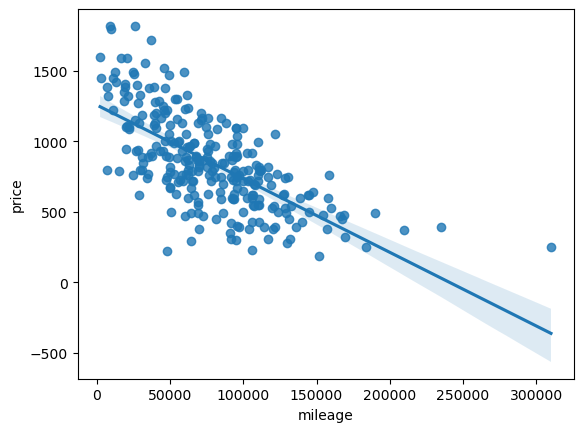

In [28]:
sns.regplot(x='mileage', y='price', data=df) # 주행거리와 가격의 관계 시각화
# 그래프에서 선 주위에 있는 영역은 뭘 의미하는 건가요? => 절편과 기울기도 각각의 신뢰 구간이 있는데 그 걸로 나타낼 수 있는 범위

In [30]:
# 회귀분석
from statsmodels.formula.api import ols # OLS: 최소제곱법
m = ols('price ~ mileage', df).fit()
m.summary()
# Intercept(절편) 1258.7668  주행거리 0Km일 때 1258만원 
# mileage (기울기)  -0.0052  1만Km마다 52만원 꼴로 가격이 떨어짐

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.81e-38
Time:                        14:43:01   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# 가격 예측
new_df = pd.DataFrame({'mileage': [10000, 20000]})
new_df

,mileage
0,10000
1,20000


In [34]:
new_df['price'] = m.predict(new_df['mileage'])
new_df

,mileage,price
0,10000,1206.483684
1,20000,1154.200600


In [37]:
sp = pd.read_excel('data/speed.xlsx')
sp.head() # speed: 차량 속도, dist: 제동 거리

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


<AxesSubplot:xlabel='speed', ylabel='dist'>

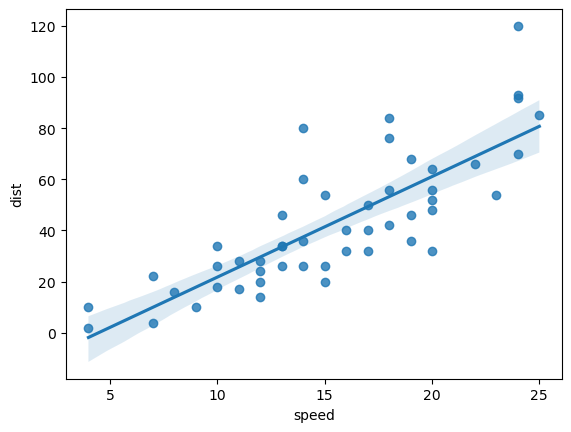

In [39]:
# 실습
# 속도 'speed'를 독립변수(x), 제동거리 'dist'를 종속변수(y)로 분석 => 'dist ~ speed'
sns.regplot(x='speed', y='dist', data=sp)

In [40]:
d = ols('dist ~ speed', sp).fit()
d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.49e-12
Time:                        15:21:30   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
d.predict({'speed':10})

0    21.744993
dtype: float64

In [47]:
d = ols('price ~ mileage + year', df).fit()
d.summary()
# price = a            +  b * mileage + c * year
#     -1.688e+5       -0.0023       +84.3822

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.62e-82
Time:                        16:14:33   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.688e+05   9597.865    -17.592      0.000   -1.88e+05    -1.5e+05
mileage       -0.0023      0.000     -8.143      0.000      -0.003      -0.002
year          84.3822      4.761     17.724      0.000      75.009      93.755
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                     8.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# 표준화
d = ols('price ~ scale(mileage) + scale(year)', df).fit() 
d.summary()
# R제곱이 변하진 않음
# 기울기가 변화 => 주행거리는/연식은 1 표준편차만큼 변할 때 100.2044 만원씩 감소, 연식은 218.1006 만원씩 증가 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.62e-82
Time:                        16:33:25   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        853.6606     10.112     84.419      0.000     833.752     873.569
scale(mileage)  -100.2044     12.306     -8.143      0.000    -124.431     -75.978
scale(year)      218.1006     12.306     17.724      0.000     193.874     242.327
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                         1.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# 각각의 표준편차로 나누는 것
df.describe()

,mileage,price,year,my_car_damage,other_car_damage
count,274.000000,274.000000,274.000000,2.740000e+02,2.740000e+02
mean,77483.222628,853.660584,2013.273723,2.319453e+06,1.807992e+06
std,43015.794453,332.613127,2.589406,3.080107e+06,4.655390e+06
min,2287.000000,190.000000,2006.000000,0.000000e+00,0.000000e+00
25%,47597.500000,620.000000,2011.000000,0.000000e+00,0.000000e+00
50%,71649.000000,805.000000,2014.000000,1.100410e+06,3.986190e+05
75%,103193.750000,1090.000000,2015.000000,3.002840e+06,1.640666e+06
max,310000.000000,1820.000000,2018.000000,1.536732e+07,5.510890e+07


In [49]:
m = ols('price ~ mileage.rank() + year.rank()', df).fit()
m.summary()
# 등수로 바꾸는 것: 장점 -> 너무 튀는 숫자가 있을 때 완화시켜준다
#                  단점 -> 원래 값을 알 수 없음(원래값->등수 O, 등수 ->원래값X)
#                  단점 -> 1등보다 잘하거나, 꼴등보다 못하면 예측

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     467.7
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.33e-88
Time:                        16:47:51   Log-Likelihood:                -1774.8
No. Observations:                 274   AIC:                             3556.
Df Residuals:                     271   BIC:                             3566.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        659.2814     36.926     17.854      0.000     586.582     731.981
mileage.rank()    -1.3652      0.146     -9.346      0.000      -1.653      -1.078
year.rank()        2.7789      0.147     18.843      0.000       2.489       3.069
==============================================================================
Omnibus:                        2.652   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.440
Skew:                           0.139   Prob(JB):                        0.295
Kurtosis:                       3.369   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# min-max scaling 또는 normalization
# 단위를 없애주는 다른 방법: 최소값 = 0, 최대값 = 1
m = ols('price ~ I((mileage-2287)/307713) + I((year-2006)/12)', df).fit()
m.summary()
# 단점: 극단값이 있는 경우에 약함

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     403.5
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           5.62e-82
Time:                        16:47:58   Log-Likelihood:                -1790.2
No. Observations:                 274   AIC:                             3586.
Df Residuals:                     271   BIC:                             3597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      415.3767     51.152      8.120      0.000     314.671     516.082
I((mileage - 2287) / 307713)  -718.1230     88.189     -8.143      0.000    -891.746    -544.500
I((year - 2006) / 12)         1012.5860     57.132     17.724      0.000     900.107    1125.065
==============================================================================
Omnibus:                       11.272   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                           0.435   Prob(JB):                      0.00276
Kurtosis:                       3.523   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# 퀴즈
iq = pd.read_excel('data/iqsize.xlsx')
iq.head()
# PIQ: 동작성 지능
# Brain: 두뇌의 크기(부피)
# Height: 키
# Weight: 체중

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146


In [56]:
m = ols('PIQ ~ Height + Weight', iq).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.3144
Date:                Thu, 16 Feb 2023   Prob (F-statistic):              0.732
Time:                        17:06:30   Log-Likelihood:                -171.55
No. Observations:                  38   AIC:                             349.1
Df Residuals:                      35   BIC:                             354.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.0402     71.316      2.300      0.028      19.260     308.820
Height        -1.0519      1.327     -0.793      0.433      -3.745       1.641
Weight         0.1276      0.226      0.565      0.575      -0.331       0.586
==============================================================================
Omnibus:                        6.646   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                2.149
Skew:                          -0.057   Prob(JB):                        0.341
Kurtosis:                       1.841   Cond. No.                     3.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
m = ols('PIQ ~ Height + Weight + Brain', iq).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Thu, 16 Feb 2023   Prob (F-statistic):            0.00722
Time:                        17:07:49   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3536     62.971      1.768      0.086     -16.619     239.326
Height        -2.7319      1.229     -2.222      0.033      -5.230      -0.233
Weight         0.0006      0.197      0.003      0.998      -0.400       0.401
Brain          2.0604      0.563      3.657      0.001       0.915       3.205
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.088
Skew:                           0.409   Prob(JB):                        0.580
Kurtosis:                       2.859   Cond. No.                     3.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""